Simulated Future Stock Prices Based on Market Return (Rm):
Min Future Stock Price (Rm): $99.21
Max Future Stock Price (Rm): $202.44

Simulated Future Stock Prices Based on Beta (β):
Min Future Stock Price (Beta): $152.98
Max Future Stock Price (Beta): $156.55


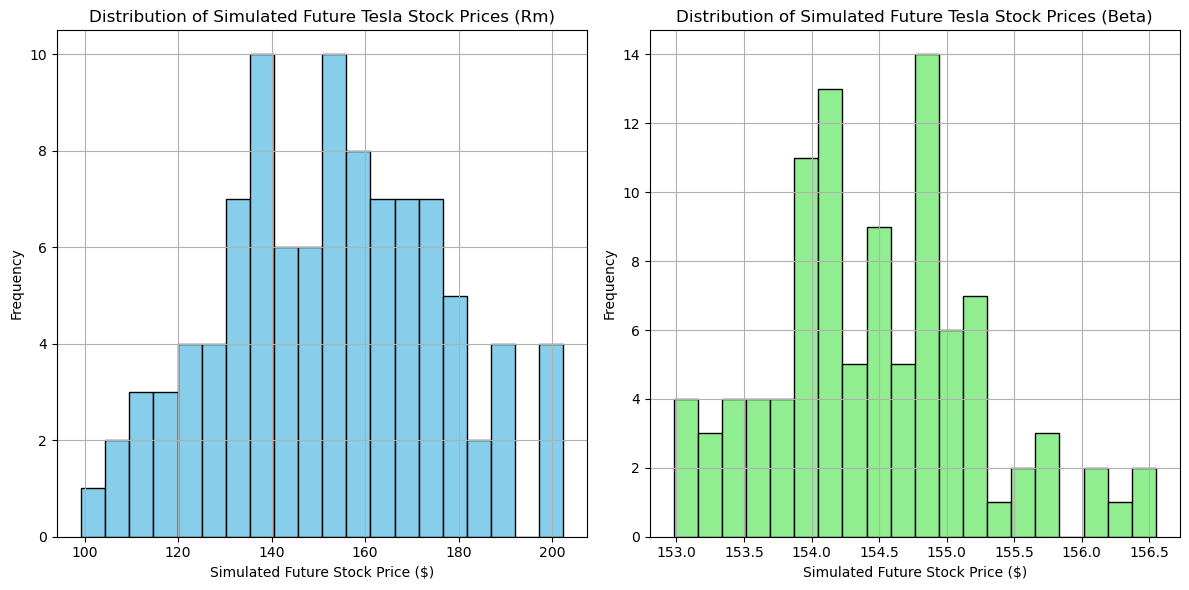

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 138.85  # Current stock price of Tesla (in USD)
Rf = 0.03  # Risk-free rate (3%)
beta_mean = 1.65  # Mean beta of Tesla
beta_stddev = 0.10  # Standard deviation for beta (10%)
Rm_mean = 0.08  # Mean expected market return (8%)
Rm_stddev = 0.10  # Standard deviation for market return (10%)
T = 1  # Time horizon in years
N = 100  # Number of simulations

# Simulate 100 different values of Rm (market return) using a normal distribution
Rm_simulations = np.random.normal(Rm_mean, Rm_stddev, N)

# Calculate the expected return (E(R)) for each Rm using the CAPM formula
E_R_Rm = Rf + beta_mean * (Rm_simulations - Rf)

# Estimate the future stock price of Tesla using the expected return for each simulation
S_T_Rm_simulations = S0 * (1 + E_R_Rm) ** T

# Simulate 100 different values of beta using a normal distribution
beta_simulations = np.random.normal(beta_mean, beta_stddev, N)

# Calculate the expected return (E(R)) for each beta using the CAPM formula
E_R_Beta = Rf + beta_simulations * (Rm_mean - Rf)

# Estimate the future stock price of Tesla using the expected return for each simulation
S_T_Beta_simulations = S0 * (1 + E_R_Beta) ** T

# Compare the min and max of both simulations
min_S_T_Rm = np.min(S_T_Rm_simulations)
max_S_T_Rm = np.max(S_T_Rm_simulations)
min_S_T_Beta = np.min(S_T_Beta_simulations)
max_S_T_Beta = np.max(S_T_Beta_simulations)

# Output the results
print(f"Simulated Future Stock Prices Based on Market Return (Rm):")
print(f"Min Future Stock Price (Rm): ${min_S_T_Rm:.2f}")
print(f"Max Future Stock Price (Rm): ${max_S_T_Rm:.2f}")

print(f"\nSimulated Future Stock Prices Based on Beta (β):")
print(f"Min Future Stock Price (Beta): ${min_S_T_Beta:.2f}")
print(f"Max Future Stock Price (Beta): ${max_S_T_Beta:.2f}")

# Plot the results to visualize the distribution of the future stock prices
plt.figure(figsize=(12, 6))

# Histogram for Market Return (Rm) Simulation
plt.subplot(1, 2, 1)
plt.hist(S_T_Rm_simulations, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Simulated Future Tesla Stock Prices (Rm)")
plt.xlabel("Simulated Future Stock Price ($)")
plt.ylabel("Frequency")
plt.grid(True)

# Histogram for Beta Simulation
plt.subplot(1, 2, 2)
plt.hist(S_T_Beta_simulations, bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribution of Simulated Future Tesla Stock Prices (Beta)")
plt.xlabel("Simulated Future Stock Price ($)")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()



                            OLS Regression Results                            
Dep. Variable:            Tesla_Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     236.6
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           3.29e-44
Time:                        08:59:13   Log-Likelihood:                -293.46
No. Observations:                 100   AIC:                             594.9
Df Residuals:                      96   BIC:                             605.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -155.1378     78.815     -1.

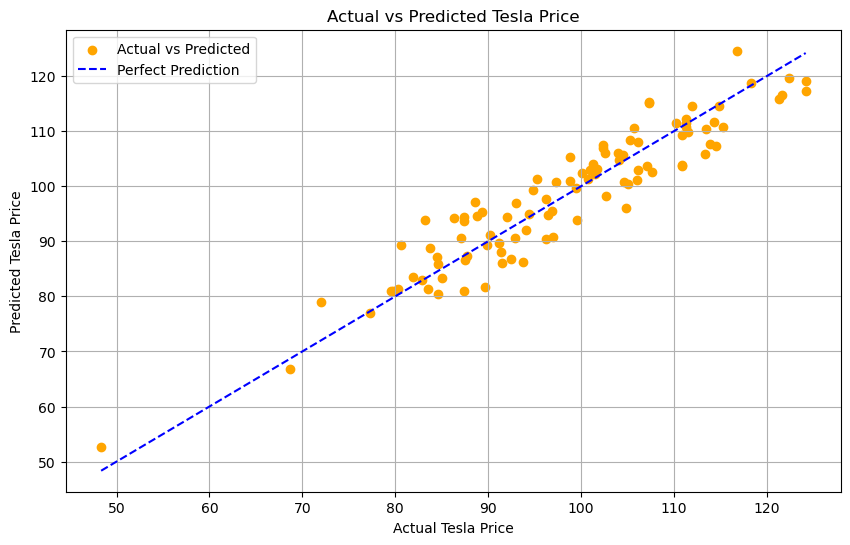

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Parameters
n_samples = 100  # Number of samples for simulation
beta_mean = 1.65  # Mean value for Beta
Rf_mean = 0.03  # Mean value for Risk-Free Rate
Rm_mean = 0.08  # Mean value for Market Return
beta_stddev = 0.01  # Standard deviation for Beta (1%)
Rf_stddev = 0.05  # Standard deviation for Risk-Free Rate (5%)
Rm_stddev = 0.10  # Standard deviation for Market Return (10%)

# Simulate data for Beta, Risk-Free Rate, and Market Return
beta_data = np.random.normal(beta_mean, beta_stddev, n_samples)
Rf_data = np.random.normal(Rf_mean, Rf_stddev, n_samples)
Rm_data = np.random.normal(Rm_mean, Rm_stddev, n_samples)

# Simulate Tesla stock prices as a linear function of Beta, Rf, and Rm
# Y = a*Beta + b*Rf + c*Rm + noise
a, b, c = 50, 100, 150  # Coefficients for the linear model (randomly chosen)
noise = np.random.normal(0, 5, n_samples)  # Add some random noise to the stock price

# Tesla stock price
Y_data = a * beta_data + b * Rf_data + c * Rm_data + noise

# Create a DataFrame for better readability
data = pd.DataFrame({
    'Beta': beta_data,
    'Risk_Free_Rate': Rf_data,
    'Market_Return': Rm_data,
    'Tesla_Price': Y_data
})

# Define the independent variables (X) and dependent variable (Y)
X = data[['Beta', 'Risk_Free_Rate', 'Market_Return']]
X = sm.add_constant(X)  # Add a constant term (intercept) to the model
Y = data['Tesla_Price']

# Fit the model using statsmodels
model = sm.OLS(Y, X).fit()

# Print the statistical summary of the model
print(model.summary())

# Visualize the predicted vs actual Tesla prices
Y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(Y, Y_pred, color='orange', label='Actual vs Predicted')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], color='blue', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Tesla Price')
plt.ylabel('Predicted Tesla Price')
plt.title('Actual vs Predicted Tesla Price')
plt.legend()
plt.grid(True)
plt.show()



In [4]:
import numpy as np
import yfinance as yf
from scipy.stats import norm

# Fetch real-time Tesla stock price
tesla_ticker = "TSLA"
tesla_data = yf.Ticker(tesla_ticker)
tesla_price = tesla_data.history(period="1d")["Close"][0]

# Option parameters
S0 = tesla_price  # Real-time Tesla stock price
K = 500           # Strike price
T = 1            # Time to maturity (in years)
r = 0.03         # Risk-free rate (3%)
sigma = tesla_data.history(period="1y")["Close"].pct_change().std() * np.sqrt(252)  # Annualized volatility

# Monte Carlo Simulation
n_simulations = 100000
Z = np.random.standard_normal(n_simulations)
ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * Z)
payoff = np.maximum(ST - K, 0)
call_price_MC = np.exp(-r * T) * np.mean(payoff)

# Black-Scholes Model
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
call_price_BS = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Print results
print(f"Real-time Tesla Stock Price: ${S0:.2f}")
print(f"Implied Volatility (σ): {sigma:.4f}")
print(f"Monte Carlo Call Price: ${call_price_MC:.2f}")
print(f"Black-Scholes Call Price: ${call_price_BS:.2f}")



Real-time Tesla Stock Price: $355.84
Implied Volatility (σ): 0.6432
Monte Carlo Call Price: $52.55
Black-Scholes Call Price: $52.95


C:\Users\huypd\AppData\Local\Temp\ipykernel_5044\2088133028.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tesla_price = tesla_data.history(period="1d")["Close"][0]
